# Installation process

In [1]:
! pip install -U scikit-learn

  Using cached scikit_learn-1.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
! pip install gplearn

  Using cached gplearn-0.4.2-py3-none-any.whl (25 kB)


In [3]:
#! git clone https://github.com/trevorstephens/gplearn.git

In [4]:
pwd

'/home/jovyan/equation_discovery'

In [5]:
!python gplearn/setup.py install

running install
/srv/conda/envs/notebook/lib/python3.10/site-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/srv/conda/envs/notebook/lib/python3.10/site-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer, pypa/build or
   

## Importing packages and data

In [6]:
import os
import shutil
import copy
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error as mae
import gplearn
%matplotlib inline
from gplearn.genetic import SymbolicRegressor
from gplearn.functions import make_function
from sklearn.utils.random import check_random_state
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import graphviz
#from sklearn.model_selection import KFold

In [7]:
pwd

'/home/jovyan/equation_discovery'

In [8]:
#imported both normalized data and non-normalized
dqdz = np.load('./variables/dqdz.npy')
wq = np.load('./variables/wq.npy')
dqdz_stand = np.load('./variables/dqdz_stand.npy')
wq_stand = np.load('./variables/wq_stand.npy')

In [9]:
dqdz.shape, wq.shape, dqdz_stand.shape, wq_stand.shape

((47, 2232, 1), (47, 2232, 1), (2232, 47, 1), (2232, 47, 1))

# Data preprocessing

In [10]:
#take out column dimension
x = np.squeeze(dqdz)
y = np.squeeze(wq)

x_norm = np.squeeze(dqdz_stand)
y_norm = np.squeeze(wq_stand)
x.shape, y.shape, x_norm.shape, y_norm.shape

((47, 2232), (47, 2232), (2232, 47), (2232, 47))

In [11]:
#splitting data into training and test data -- test size is 0.33% of OG data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size=0.33, random_state=42)

In [12]:
#checking their shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1495, 47), (737, 47), (1495, 47), (737, 47))

In [13]:
#checking shapes of input
X_train.shape,y_train[:,40:46].ravel().shape

((1495, 47), (8970,))

In [14]:
#checking shapes
X_train[:,46].reshape(-1,1).shape

(1495, 1)

In [15]:
#.ravel() takes the column away and just makes it a 1d -like array (look at shape before and after)
y_train[:,46].ravel()

array([-0.51798479, -0.65443672,  0.0575451 , ...,  1.22852372,
       -0.53956698, -1.36374291])

# Training the model for a singular layer

In [38]:
model = SymbolicRegressor(function_set = ('add','sub','mul','log','inv'),generations=45, 
                          tournament_size=20, random_state=42,stopping_criteria=0.01,verbose = 1,
                          max_samples=0.9, metric = 'mean absolute error'
                            )

# if False:
#     import pickle
#     sr_model = SymbolicRegressor()

In [45]:
#fit data to the model
model.fit(X_train[:,45].reshape(-1,1), y_train[:,45].ravel())

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    20.26          467.332        7         0.678894         0.754338     47.48s
   1    10.60          2.27727        7         0.678593         0.757039     38.27s
   2     8.06          1.90865       11         0.650967         0.715225     34.80s
   3     8.20          2.22244       11         0.656818         0.662769     38.03s
   4     8.33          1.82073       11         0.648083         0.737215     34.11s
   5     9.48          1.94291       11         0.645613         0.759359     34.05s
   6    10.55          2.16806       17         0.640158         0.658928     34.08s
   7    10.84          2.04997       25         0.631645         0.625703     33.82s
   8    11.21          2.07504       25         0.618944          0.73959  

SymbolicRegressor(function_set=('add', 'sub', 'mul', 'log', 'inv'),
                  generations=45, max_samples=0.9, random_state=42,
                  stopping_criteria=0.01, verbose=1)

In [46]:
print(model._program.parents)
print(model._program.raw_fitness_)

{'method': 'Crossover', 'parent_idx': 688, 'parent_nodes': range(6, 15), 'donor_idx': 841, 'donor_nodes': []}
0.5667284980418597


In [47]:
#make predictions based on test data
y_predict = model.predict(X_test[:,45].reshape(-1,1))

In [48]:
#get r^2 score based on test data
# score = model.score(X_test[:,40].reshape(-1,1), y_test[:,40].reshape(-1,1))
score = model.score(X_test[:,45].reshape(-1,1), y_test[:,45].ravel())

the r^2 score is 0.2506865681444259


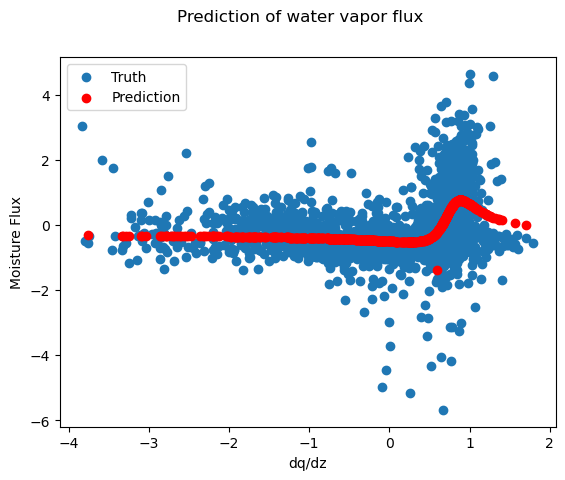

In [49]:
#plotting prediction at surface for whole data 
plt.scatter(x_norm[:,45], y_norm[:,45], label = "Truth", )#color = 'blue')
plt.scatter(X_test[:,45],y_predict, color = "red", label = "Prediction")
plt.xlabel("dq/dz")
plt.ylabel("Moisture Flux")
plt.suptitle("Prediction of water vapor flux")
plt.legend()
print(f'the r^2 score is {score}')
             

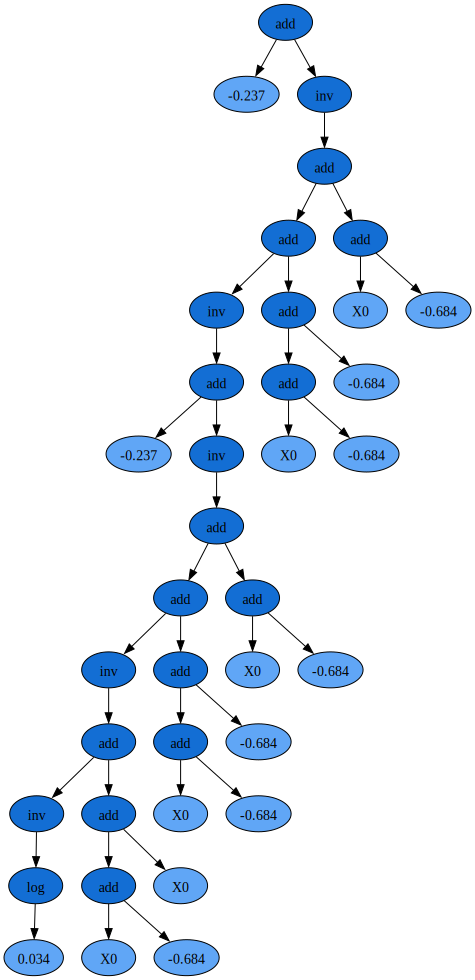

In [50]:
#visual representation of suggested equation
from sklearn.datasets import load_iris
from sklearn import tree
import collections

dot_data = model._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph

the r^2 score is 0.17525928940945568


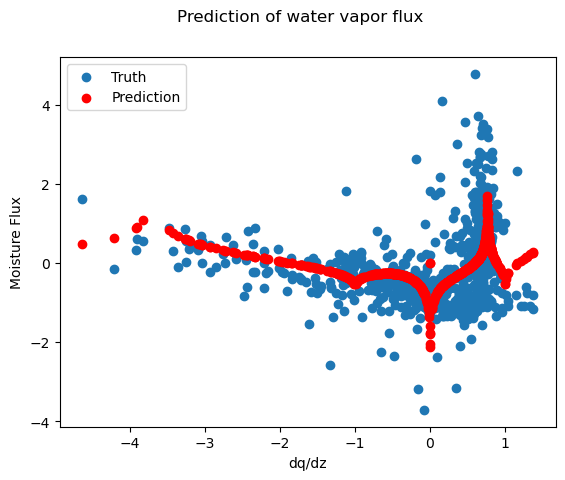

In [23]:
#plotting y prediction vs actual y values to visualize the difference
plt.scatter(X_test[:,46], y_test[:,46],label = "Truth")
plt.scatter(X_test[:,46],y_predict, color = "red", label = "Prediction")
plt.xlabel("dq/dz")
plt.ylabel("Moisture Flux")
plt.suptitle("Prediction of water vapor flux")
plt.legend()
print(f'the r^2 score is {score}')

In [24]:
#testing shapes of prediction and reality
y_predict.shape,y_test[:,46].reshape(-1,1).ravel().shape

((737,), (737,))

### finding difference in predict - reality

In [25]:
#finding difference in prediction - reality
pierre_y = y_test[:,46].reshape(-1,1).ravel()
predict_y = y_predict 
difference = pierre_y - predict_y

In [26]:
mae(pierre_y, predict_y)

0.6613695454197728

In [27]:
difference.min(), difference.max(), difference.mean(), difference.std()

(-2.932035095819094,
 4.766003575652546,
 0.05534949681094268,
 0.9282250132165871)

# Training model, running it for each layer

In [28]:
model = SymbolicRegressor(function_set = ('add','sub','mul','log','inv'),generations=45, 
                          tournament_size=20, random_state=42,stopping_criteria=0.01,verbose = 1,
                          max_samples=0.9, metric = 'mean absolute error'
                            )

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    20.26          98.5859       28         0.643364         0.721045     47.32s
   1    10.71          2.32644        7         0.631116         0.753172     37.50s
   2     8.98          4.49272       42         0.626276         0.721205     34.39s
   3     7.54          1.59963       16         0.617252          0.70994     32.50s
   4     6.16          1.57246       16          0.61902         0.694079     33.72s
   5     5.79          1.42885       16         0.617174         0.710696     29.11s
   6     6.02          1.21675       18         0.614359         0.674004     28.74s
   7     7.87          1.08103        9         0.610337         0.756523     29.76s
   8    11.19          1.40831       13         0.598742         0.718612  

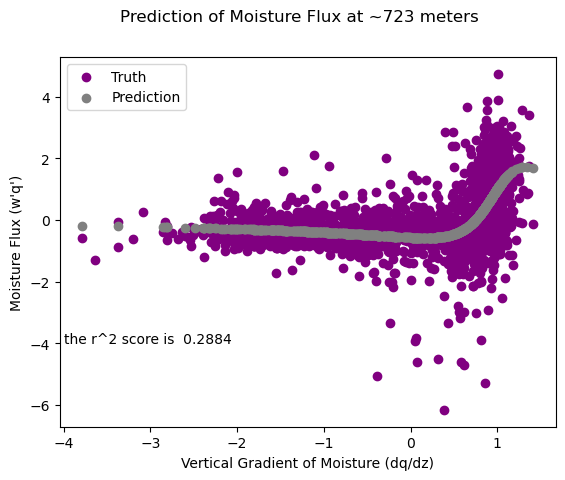

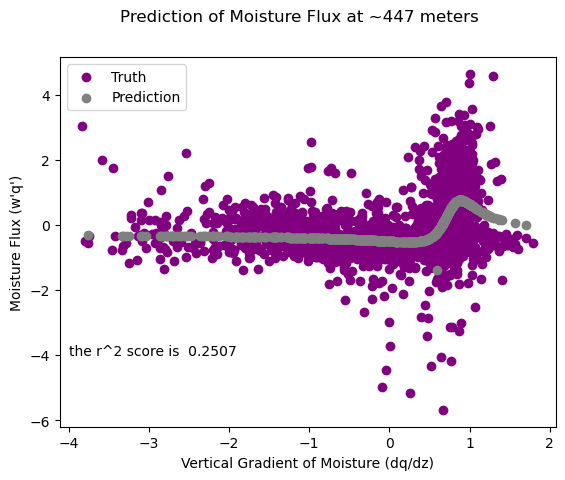

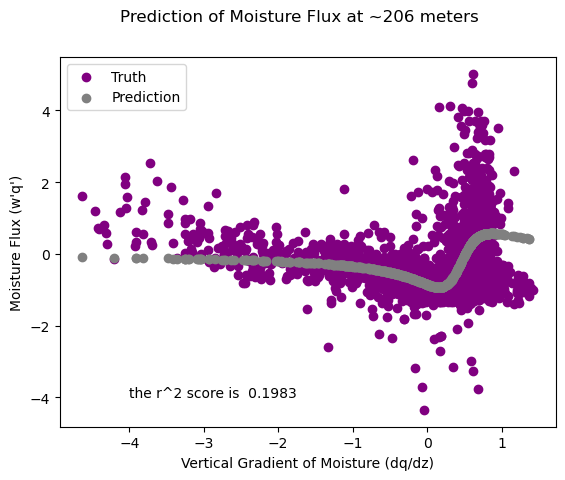

In [29]:
#running symbolic regression
for lev in range(44,47):
    model.fit(X_train[:,lev].reshape(-1,1), y_train[:,lev].ravel())
    y_predict = model.predict(X_test[:,lev].reshape(-1,1))
    score = model.score(X_test[:,lev].reshape(-1,1), y_test[:,lev].reshape(-1,1))
    print()
    print(model._program)
    print()
    print(model._program.raw_fitness_)
    # pierre_y = y_test[:,lev].reshape(-1,1).ravel()
    # print(f' The MAE is {mae(pierre_y, predict_y)}')
    

    #plotting
    fig, ax = plt.subplots()
    ax.scatter(x_norm[:,lev], y_norm[:,lev], label = "Truth",color = 'purple') #plot all datapoints for given level
    ax.scatter(X_test[:,lev],y_predict, color = "grey", label = "Prediction") #plot just test datapoints and the prediction
    plt.xlabel("Vertical Gradient of Moisture (dq/dz)")
    plt.ylabel("Moisture Flux (w'q')")
    ax.legend()
    ax.text(-4,-4, f'the r^2 score is {score: .4f}')
    print()
    
    if lev == 44:
        fig.suptitle(f"Prediction of Moisture Flux at ~723 meters")
    elif lev == 45:
        fig.suptitle(f"Prediction of Moisture Flux at ~447 meters")
    elif lev == 46:
        fig.suptitle(f"Prediction of Moisture Flux at ~206 meters")
        
    #print(f'the r^2 score is {score}')
    


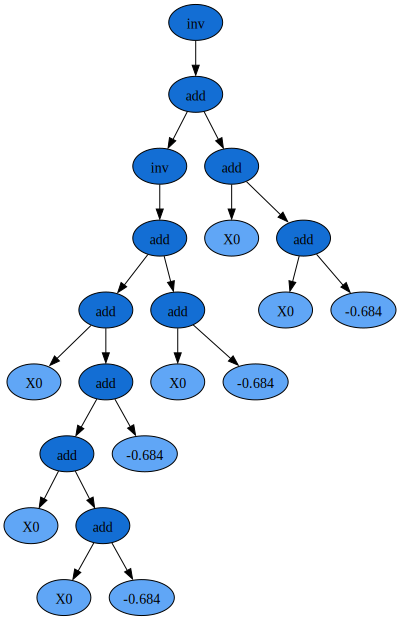

In [30]:
#visual representation of suggested equation for the last-ran layer
dot_data = model._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph